<a href="https://colab.research.google.com/github/rashmi-biswas/Netflix_movies_tvshows_clustering/blob/main/NETFLIX_MOVIES_%26_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movies and TV Shows Clustering**

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

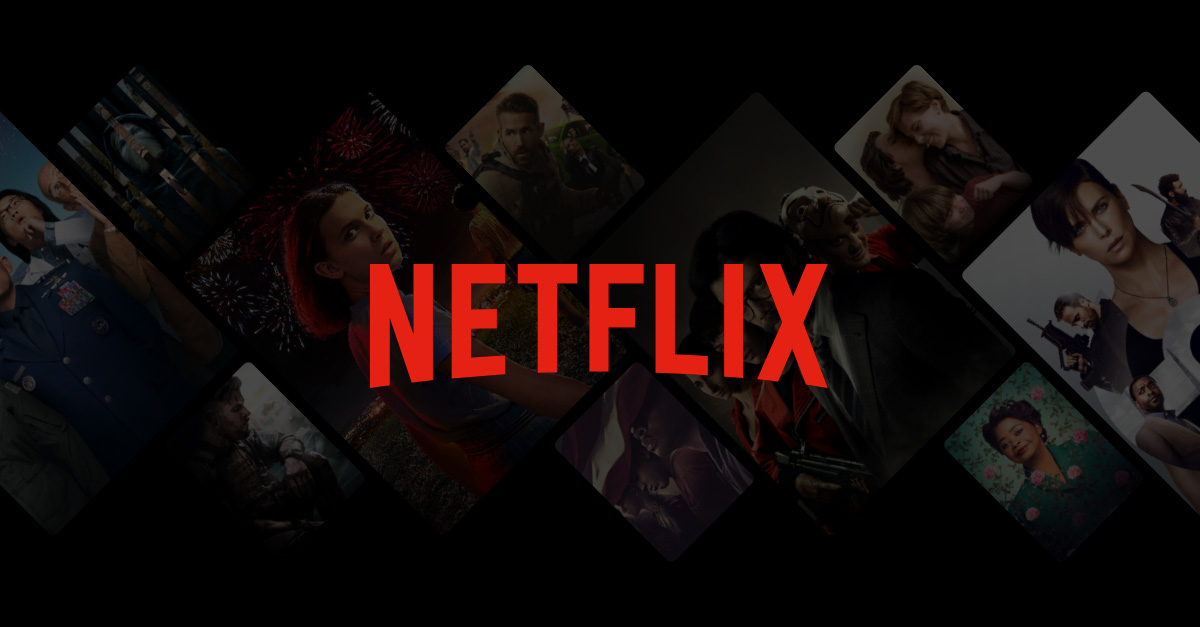

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [129]:
#importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch
import matplotlib.cm as cm

In [130]:
#mounting google drive to access the files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
#loading dataset
netflix = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/CS Project 4: ML Clustering/Dataset.csv')

### **Understanding Data**

In [132]:
#top 5 rows
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [133]:
#shape of the dataset
netflix.shape

(7787, 12)

In [134]:
#information about the dataset
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [135]:
#column names
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [136]:
#Drop Duplicates
netflix[netflix.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


**There are no duplicate values**

In [137]:
#checking null values
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [138]:
#all null values
netflix.isnull().sum().sum()

3631

There are total **3631 null values** in the dataset, out of which 2389 are in the director column, 718 are in the cast column and 507 in the country column.
We need to handle the null values of the above 3 columns.
date_added and rating also have **10 and 7 null values** respectively, which comprises of an insignificant portion of the data. 
So we will drop them.

In [139]:
#drop rows having date_added and rating as null
netflix.dropna(subset=['date_added','rating'],inplace=True)

In [140]:
#handling null values
netflix['cast'].fillna(value='No cast', inplace=True)
netflix['country'].fillna(value=netflix['country'].mode()[0],inplace=True)

In [141]:
#droping director column
netflix.drop(['director'],axis=1,inplace=True)

In [142]:
netflix.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [143]:
#convert date time format
netflix["date_added"]=pd.to_datetime(netflix["date_added"])
netflix['year_added']=netflix['date_added'].dt.year
netflix['month_added']=netflix['date_added'].dt.month
netflix['day_added']=netflix['date_added'].dt.day

In [144]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   cast          7770 non-null   object        
 4   country       7770 non-null   object        
 5   date_added    7770 non-null   datetime64[ns]
 6   release_year  7770 non-null   int64         
 7   rating        7770 non-null   object        
 8   duration      7770 non-null   object        
 9   listed_in     7770 non-null   object        
 10  description   7770 non-null   object        
 11  year_added    7770 non-null   int64         
 12  month_added   7770 non-null   int64         
 13  day_added     7770 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 910.5+ KB


In [145]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix['target_ages'] = netflix['rating'].replace(ratings)

In [146]:
# type should be a category
netflix['type'] = pd.Categorical(netflix['type'])

# target_ages is another category (4 classes)
netflix['target_ages'] = pd.Categorical(netflix['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [147]:
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12,20,Adults
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11,16,Teens
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1,1,Teens


##**Exploratory Data Analysis (EDA)**

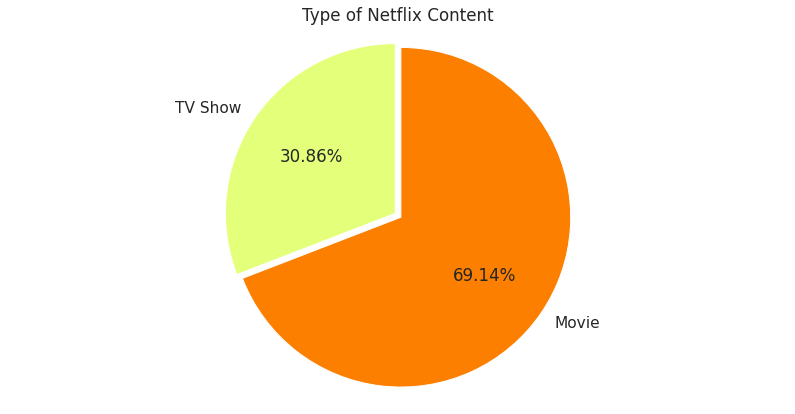

In [148]:
#Plotting pie chart on type feature
plt.figure(figsize=(14, 7))
labels=['TV Show', 'Movie']
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
plt.pie(netflix['type'].value_counts().sort_values(),labels=labels,colors= colors, explode=[0.02,0.02],
        autopct='%1.2f%%', startangle=90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Rating')

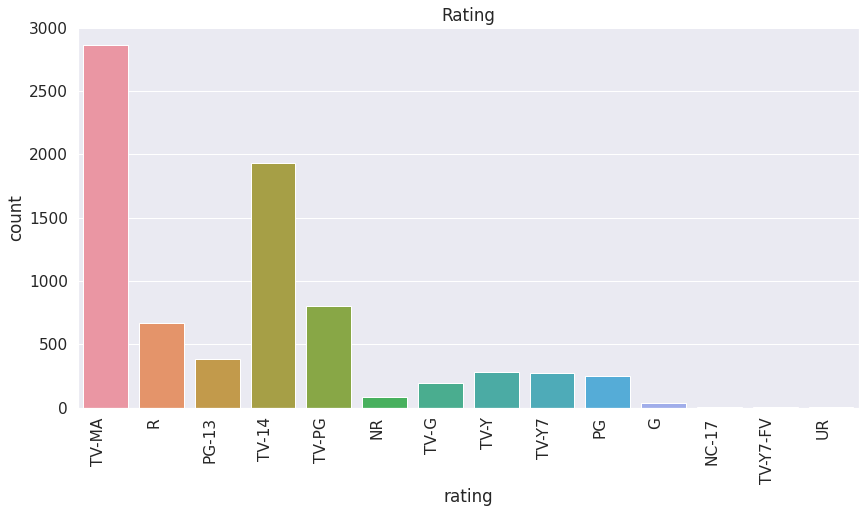

In [149]:
#Ratings on Netflix
sns.countplot(netflix['rating'])
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(14,7)
plt.title('Rating')

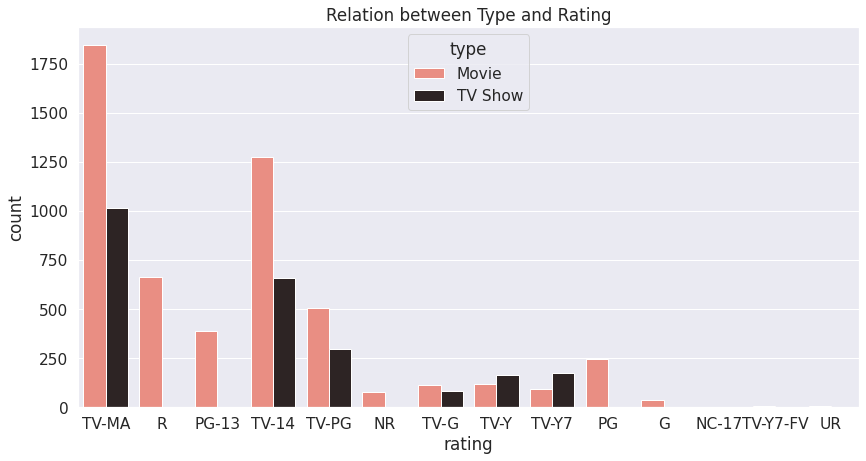

In [150]:
#Type vs Rating
plt.figure(figsize=(14,7))
sns.countplot(x='rating',hue='type',data=netflix, palette='dark:salmon_r')
plt.title('Relation between Type and Rating')
plt.show()

In [151]:
#Production Growth based on type of Content and release year
yearly_movies=netflix[netflix.type =='TV Show']['release_year'].value_counts().sort_index(ascending=False).head(15)
yearly_shows=netflix[netflix.type =='Movie']['release_year'].value_counts().sort_index(ascending=False).head(15)
total_content=netflix['release_year'].value_counts().sort_index(ascending=False).head(15)

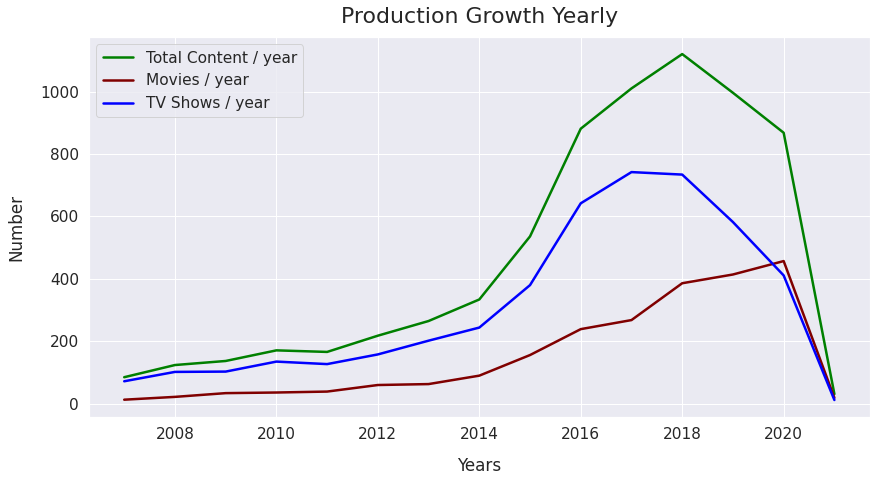

In [152]:
#Yearwise growth in production
sns.set(font_scale=1.4)
total_content.plot(figsize=(14, 7), linewidth=2.5, color='green',label="Total Content / year")
yearly_movies.plot(figsize=(14, 7), linewidth=2.5, color='maroon',label="Movies / year",ms=3)
yearly_shows.plot(figsize=(14, 7), linewidth=2.5, color='blue',label="TV Shows / year")
plt.xlabel("Years", labelpad=15)
plt.ylabel("Number", labelpad=15)
plt.legend()
plt.title("Production Growth Yearly", y=1.02, fontsize=22);

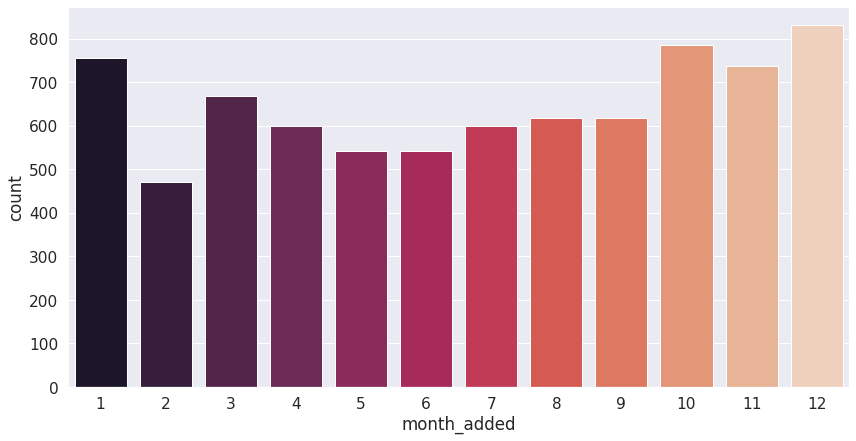

In [153]:
# Release of movies month wise
plt.figure(figsize=(14,7))
ax=sns.countplot('month_added',data= netflix , palette='rocket')

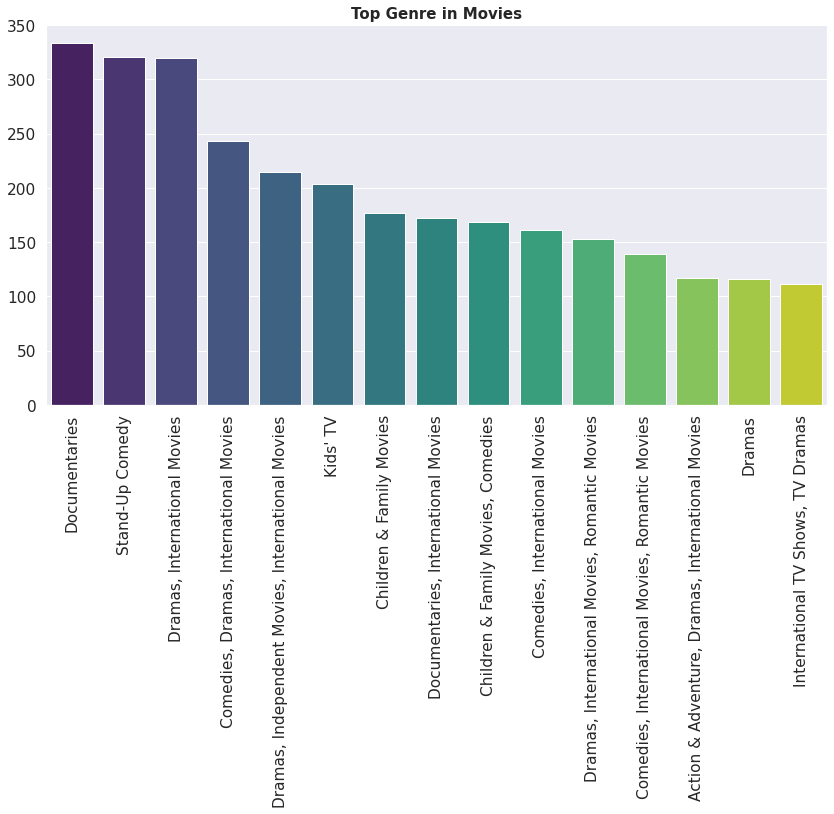

In [154]:
#Top 10 Genre in movies
plt.figure(figsize=(14,7))
sns.barplot(x = netflix["listed_in"].value_counts().head(15).index,
            y = netflix["listed_in"].value_counts().head(15).values,palette="viridis")
plt.xticks(rotation=90)
plt.title("Top Genre in Movies",size='15',fontweight="bold")
plt.show()

In [155]:
#convert string to integer
netflix['duration']=netflix['duration'].str.replace('Season','')
netflix['duration']=netflix['duration'].str.replace('s','')
netflix['duration']=netflix['duration'].str.replace('min','')

netflix['duration']=netflix['duration'].astype(str).astype(int)
netflix['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7782     99
7783    111
7784     44
7785      1
7786     90
Name: duration, Length: 7770, dtype: int64

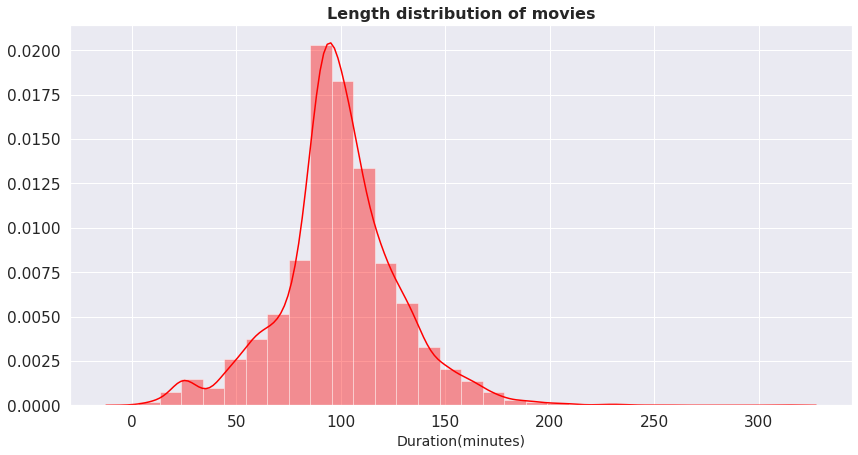

In [156]:
# Length distribution of movies
movie_df = netflix[netflix['type']=='Movie']

plt.figure(figsize=(14, 7))

sns.distplot(movie_df['duration'], bins=30,color='Red').set(ylabel=None)

plt.title('Length distribution of movies', fontsize=16,fontweight="bold")
plt.xlabel('Duration(minutes)', fontsize=14)
plt.show()

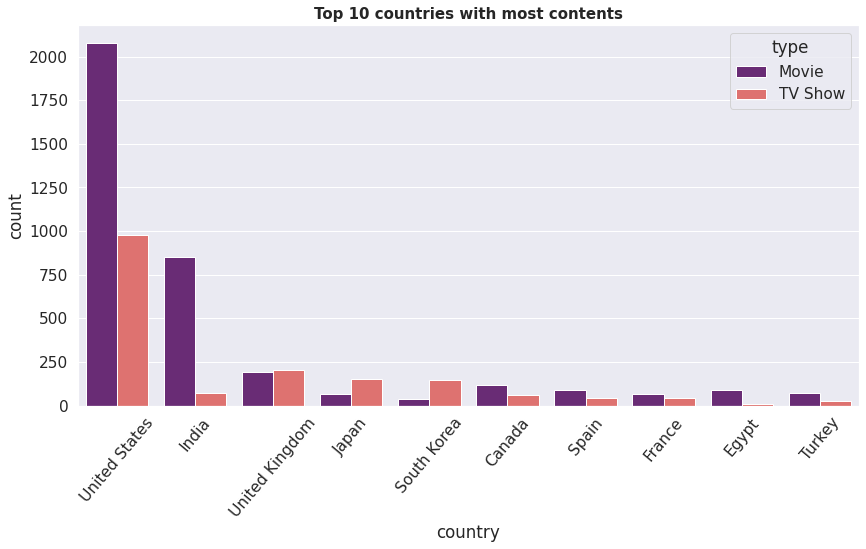

In [157]:
#Analysing top10 countries with most content 
plt.figure(figsize=(14,7))
sns.countplot(x=netflix['country'],palette="magma",order=netflix['country'].value_counts().index[0:10],hue=netflix['type'])
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()

<BarContainer object of 11 artists>

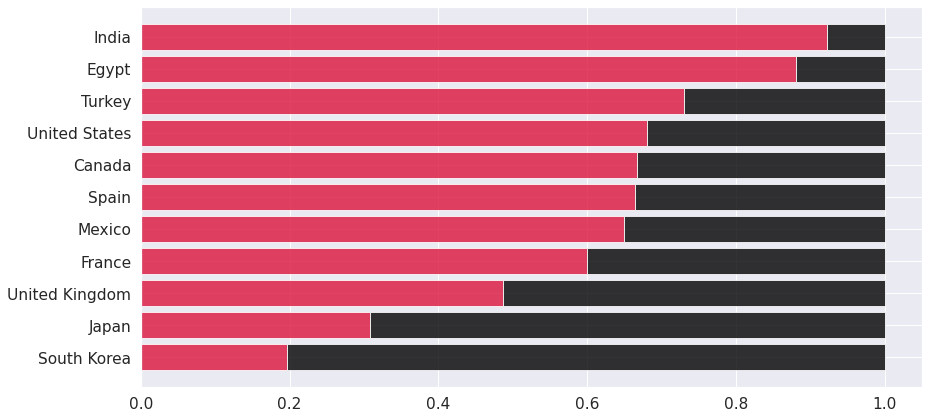

In [158]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = netflix['country'].value_counts()[:11].index
content_data = netflix[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(14, 7),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')

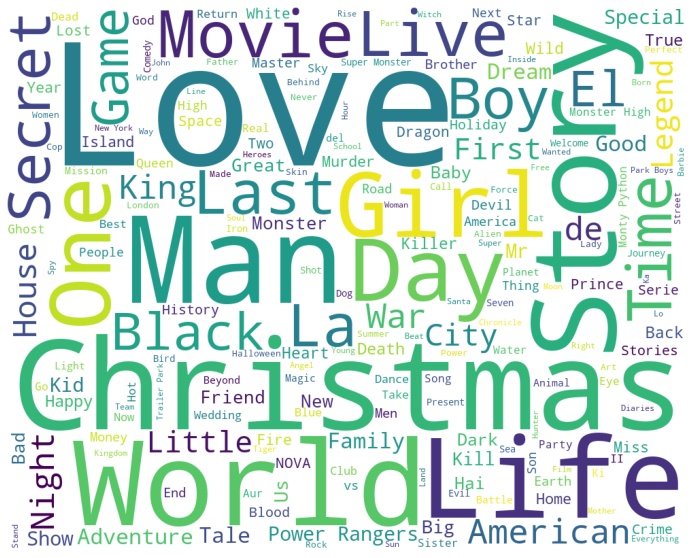

In [159]:
#Most occurred word in title
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(
                          background_color='white',
                          width=1000,
                          height=800
                         ).generate(" ".join(netflix.title))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [160]:
# Preparing data for heatmap
netflix['count'] = 1
data = netflix.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


heatmap = netflix.loc[netflix['country'].isin(data)]
heatmap = pd.crosstab(heatmap['country'],heatmap['target_ages'],normalize = "index").T
heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
target_ages,,,,,,,,,,
Kids,0.180791,0.000000,0.095652,0.016251,0.008929,0.02,0.027322,0.022388,0.093434,0.089479
Older Kids,0.225989,0.039604,0.060870,0.160347,0.272321,0.07,0.120219,0.044776,0.204545,0.195346
Teens,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199
Adults,0.446328,0.277228,0.678261,0.255688,0.366071,0.77,0.469945,0.835821,0.512626,0.471976


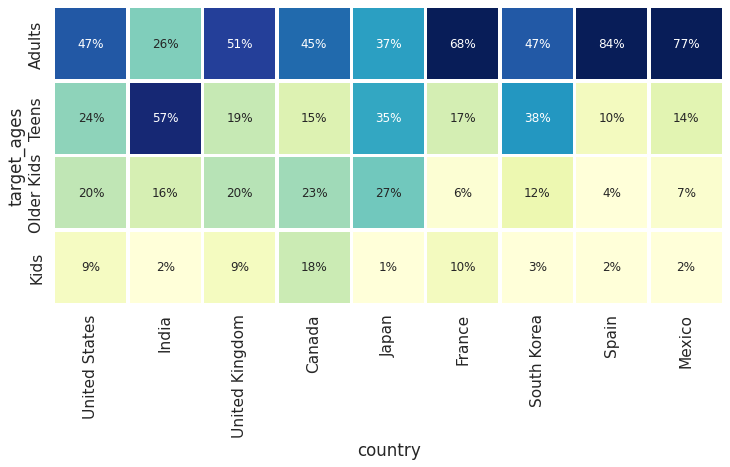

In [161]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

## **EDA Findings**

1.  Most of the type of content on Netflix is Movies which is 69.14%, whereas TV shows consist of 30.86% of the content.
2. The most frequent visitors of Netflix are Adults and Teens.
3. Production growth increased gradually after 2014 and experienced a downfall again in 2020. Covid epidemic can be a major reason behind the downfall in production.
4. Most of the content added on Netflix is in the month of October, November, December, and January. Maybe the festival season followed by the vacation season of Christmas and New Year can be the possible reason behind this.
5. The top genre of movies on Netflix is Documentaries, Stand up Comedy, Dramas, and International Movies.
6. The average length of movies on Netflix is about 100 minutes.
7. Most of the content on Netflix is added by the United States, followed by India and United Kingdom.
8. Most frequently occurring words in the title of Netflix Movies are Love, Christmas, Life, World, Man, Story, Girl, Day, One, Game, and Secret.
9. In all other countries, the maximum population using Netflix is Adults. But in India, the maximum population is teenagers.

## **No. of Category**

In [162]:
netflix.listed_in.nunique()

491

In [163]:
netflix.listed_in.isna().sum()

0

There are total **491 unique values** present and **no null values** are present

In [164]:
#value counts
netflix.listed_in.value_counts().to_frame().T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"TV Horror, TV Mysteries, Teen TV Shows","Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Anime Series, Crime TV Shows, TV Thrillers","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
listed_in,334,321,320,243,215,204,177,172,169,161,...,1,1,1,1,1,1,1,1,1,1


In [165]:
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages', 'count'],
      dtype='object')

In [166]:
#making categories
categories = ", ".join(netflix['listed_in']).split(", ")
categories[:5]

['International TV Shows',
 'TV Dramas',
 'TV Sci-Fi & Fantasy',
 'Dramas',
 'International Movies']

In [167]:
len(categories)

17042

In [168]:
len(set(categories))

42

There are **42 unique categories** present & in this dataset **all the categories occurred in total 17042 times**

Creating a dictionary **( category_wise_count )** where for each category there will be a value which basically tells us how many times that particular category occurred

In [169]:
category_wise_count = {}
for category in set(categories):
  category_wise_count[category] = categories.count(category)

In [170]:
category_wise_count

{'Action & Adventure': 721,
 'Anime Features': 57,
 'Anime Series': 146,
 'British TV Shows': 231,
 'Children & Family Movies': 532,
 'Classic & Cult TV': 25,
 'Classic Movies': 103,
 'Comedies': 1471,
 'Crime TV Shows': 426,
 'Cult Movies': 59,
 'Documentaries': 786,
 'Docuseries': 352,
 'Dramas': 2105,
 'Faith & Spirituality': 57,
 'Horror Movies': 312,
 'Independent Movies': 673,
 'International Movies': 2437,
 'International TV Shows': 1197,
 "Kids' TV": 411,
 'Korean TV Shows': 150,
 'LGBTQ Movies': 90,
 'Movies': 52,
 'Music & Musicals': 321,
 'Reality TV': 222,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Sci-Fi & Fantasy': 218,
 'Science & Nature TV': 85,
 'Spanish-Language TV Shows': 146,
 'Sports Movies': 196,
 'Stand-Up Comedy': 329,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Action & Adventure': 149,
 'TV Comedies': 517,
 'TV Dramas': 703,
 'TV Horror': 69,
 'TV Mysteries': 90,
 'TV Sci-Fi & Fantasy': 75,
 'TV Shows': 12,
 'TV Thrillers': 50,
 'Teen TV Shows': 60,
 

In [171]:
#sorting category wise count by value
sorted_category_wise_count = sorted(category_wise_count.items(), key=lambda x: x[1])
sorted_category_wise_count[:4]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52)]

In [172]:
#Top 5 least occurred category
sorted_category_wise_count[:5]

[('TV Shows', 12),
 ('Classic & Cult TV', 25),
 ('TV Thrillers', 50),
 ('Stand-Up Comedy & Talk Shows', 52),
 ('Movies', 52)]

In [173]:
#Top 5 most occurred category
sorted_category_wise_count[-5:]

[('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [174]:
#Top 10 most occurred category
top_10_most_occurred_categories = sorted_category_wise_count[-10:]

In [175]:
top_10_most_occurred_categories

[('Romantic Movies', 531),
 ('Children & Family Movies', 532),
 ('Independent Movies', 673),
 ('TV Dramas', 703),
 ('Action & Adventure', 721),
 ('Documentaries', 786),
 ('International TV Shows', 1197),
 ('Comedies', 1471),
 ('Dramas', 2105),
 ('International Movies', 2437)]

In [176]:
#seperate name and count
top_10_most_occurred_category_name = []
top_10_most_occurred_category_count = []
for tup in top_10_most_occurred_categories:
  top_10_most_occurred_category_name.append(tup[0])
  top_10_most_occurred_category_count.append(tup[1])

In [177]:
top_10_most_occurred_category_name

['Romantic Movies',
 'Children & Family Movies',
 'Independent Movies',
 'TV Dramas',
 'Action & Adventure',
 'Documentaries',
 'International TV Shows',
 'Comedies',
 'Dramas',
 'International Movies']

In [178]:
top_10_most_occurred_category_count

[531, 532, 673, 703, 721, 786, 1197, 1471, 2105, 2437]

In [179]:
#datatype
type(netflix.listed_in.iloc[0])

str

In [180]:
(netflix.listed_in.iloc[0])

'International TV Shows, TV Dramas, TV Sci-Fi & Fantasy'

In [181]:
(netflix.listed_in.iloc[0]).split(",")

['International TV Shows', ' TV Dramas', ' TV Sci-Fi & Fantasy']

In [182]:
len((netflix.listed_in.iloc[0]).split(","))

3

In [183]:
no_of_category = []
for categories in netflix.listed_in.values:
  len_categories = len(categories.split(","))
  no_of_category.append(len_categories)

In [184]:
#creating new column
netflix['no_of_category'] = no_of_category

In [185]:
netflix.no_of_category.unique()

array([3, 2, 1])

In [186]:
netflix.columns

Index(['show_id', 'type', 'title', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'day_added', 'target_ages', 'count',
       'no_of_category'],
      dtype='object')

## **Data Preparation**

In [187]:
netflix.description.iloc[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [188]:
First_des = netflix.description.iloc[0]
First_des

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [189]:
#download nltk
import nltk 
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [

True

In [190]:
#removing punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [191]:
netflix['description'] = netflix['description'].apply(remove_punctuation)
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,14,Adults,1,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,23,Adults,1,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",When an army recruit is found dead his fellow ...,2018,12,20,Adults,1,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",In a postapocalyptic world ragdoll robots hide...,2017,11,16,Teens,1,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become cardcount...,2020,1,1,Teens,1,1


In [192]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [193]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

i,  me,  my,  myself,  we,  our,  ours,  ourselves,  you,  you're,  you've,  you'll,  you'd,  your,  yours,  yourself,  yourselves,  he,  him,  his,  himself,  she,  she's,  her,  hers,  herself,  it,  it's,  its,  itself,  they,  them,  their,  theirs,  themselves,  what,  which,  who,  whom,  this,  that,  that'll,  these,  those,  am,  is,  are,  was,  were,  be,  been,  being,  have,  has,  had,  having,  do,  does,  did,  doing,  a,  an,  the,  and,  but,  if,  or,  because,  as,  until,  while,  of,  at,  by,  for,  with,  about,  against,  between,  into,  through,  during,  before,  after,  above,  below,  to,  from,  up,  down,  in,  out,  on,  off,  over,  under,  again,  further,  then,  once,  here,  there,  when,  where,  why,  how,  all,  any,  both,  each,  few,  more,  most,  other,  some,  such,  no,  nor,  not,  only,  own,  same,  so,  than,  too,  very,  s,  t,  can,  will,  just,  don,  don't,  should,  should've,  now,  d,  ll,  m,  o,  re,  ve,  y,  ain,  aren,  

In [194]:
print("Number of stopwords in english : ", len(sw))

Number of stopwords in english :  179


In [195]:
#removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [196]:
netflix['description'] = netflix['description'].apply( remove_stopwords )
netflix.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,day_added,target_ages,count,no_of_category
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",future elite inhabit island paradise far crowd...,2020,8,14,Adults,1,3
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,"Dramas, International Movies",devastating earthquake hits mexico city trappe...,2016,12,23,Adults,1,2
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,"Horror Movies, International Movies",army recruit found dead fellow soldiers forced...,2018,12,20,Adults,1,2
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,"Action & Adventure, Independent Movies, Sci-Fi...",postapocalyptic world ragdoll robots hide fear...,2017,11,16,Teens,1,3
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,brilliant group students become cardcounting e...,2020,1,1,Teens,1,1


In [197]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(netflix['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [198]:
dictionary

dict_items([('future', 7149), ('elite', 5638), ('inhabit', 8940), ('island', 9216), ('paradise', 12662), ('far', 6394), ('crowded', 4228), ('slums', 16080), ('get', 7345), ('one', 12291), ('chance', 3059), ('join', 9434), ('saved', 15184), ('squalor', 16495), ('devastating', 4822), ('earthquake', 5487), ('hits', 8301), ('mexico', 11093), ('city', 3325), ('trapped', 17897), ('survivors', 17043), ('walks', 18855), ('life', 10163), ('wait', 18832), ('rescued', 14501), ('trying', 18039), ('desperately', 4775), ('stay', 16604), ('alive', 781), ('army', 1222), ('recruit', 14221), ('found', 6933), ('dead', 4489), ('fellow', 6520), ('soldiers', 16205), ('forced', 6869), ('confront', 3778), ('terrifying', 17419), ('secret', 15372), ('thats', 17473), ('haunting', 8006), ('jungle', 9529), ('training', 17854), ('camp', 2750), ('postapocalyptic', 13341), ('world', 19292), ('ragdoll', 13940), ('robots', 14827), ('hide', 8181), ('fear', 6473), ('dangerous', 4416), ('machines', 10520), ('exterminate',